In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from subprocess import check_output
from datetime import time
print( 'The scikit learn version is {}.'.format(sklearn.__version__))

The scikit learn version is 0.19.1.


In [44]:
df = pd.read_csv("spiral.csv")
print(df.shape)
df.head()

(300, 3)


,x,y,class
0,0.000,0.000,0
1,0.001,0.010,0
2,0.006,0.019,0
3,0.016,0.026,0
4,0.021,0.035,0


In [45]:
print(df.describe())
data = df.values
X = data[:,:-1]  # all rows, no label
y = np.asarray(data[:,-1 ], dtype="|S6")  # all rows, class only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

                x           y       class
count  300.000000  300.000000  300.000000
mean    -0.012767   -0.019293    1.000000
std      0.414546    0.404655    0.817861
min     -0.888000   -0.871000    0.000000
25%     -0.258250   -0.335000    0.000000
50%      0.017000   -0.003000    1.000000
75%      0.255500    0.221000    2.000000
max      0.958000    0.881000    2.000000


Text(0,0.5,u'Y')

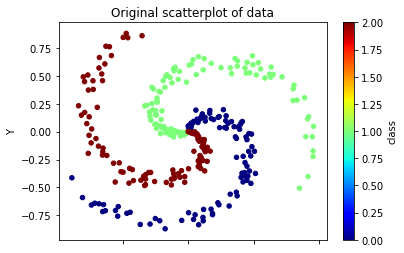

In [46]:

#it doesnt like "xrange" changed to "range"
df.plot.scatter('x', 'y', c='class', colormap='jet')
#plt.legend(iris.target_names)
plt.title('Original scatterplot of data', loc='center')
plt.xlabel('X')
plt.ylabel('Y')


In [47]:
###########################SGDClassifier Start#######################

In [48]:
from sklearn import preprocessing
# Scale the data to be between -1 and 1
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print( X_train.shape, y_train.shape)

((225, 2), (225,))


In [49]:
from sklearn.linear_model import SGDClassifier
linClf = SGDClassifier(max_iter=1000, tol=1e-3)
linClf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=0.001, verbose=0, warm_start=False)

In [50]:
#print( linClf.coef_)

In [51]:
#print( linClf.intercept_)

In [52]:
#print( linClf.decision_function(scaler.transform([[1.0, 1.1]])) )

In [53]:
from sklearn import metrics
y_train_pred = linClf.predict(X_train)
print( metrics.accuracy_score(y_train, y_train_pred) )

0.44


['1.0']


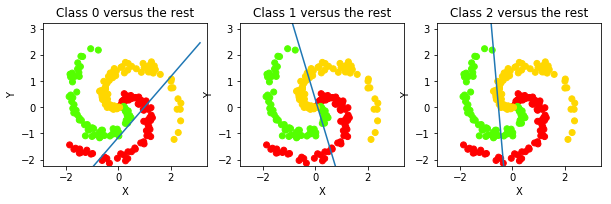

In [54]:
import numpy as np
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - .1, X_train[:, 1].max() + 1
#error in case Xs or xs
Xs = np.arange(x_min, x_max, .5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(10, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Y')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    #error here need plt.
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-linClf.intercept_[i] - Xs * linClf.coef_[i, 0]) / linClf.coef_[i, 1]
    plt.plot(Xs, ys, hold=True)#the xs has been changed to Xs, so the dimension could be fit
    
print( linClf.predict(scaler.transform([[1.7, 1.1]])) )

In [55]:
y_pred = linClf.predict(X_test)
print( metrics.accuracy_score(y_test, y_pred) )

0.37333333333333335


In [56]:
print( metrics.classification_report(y_test, y_pred) )

             precision    recall  f1-score   support

        0.0       0.27      0.15      0.19        27
        1.0       0.35      0.65      0.45        23
        2.0       0.53      0.36      0.43        25

avg / total       0.38      0.37      0.35        75



In [57]:
print( metrics.confusion_matrix(y_test, y_pred) )

[[ 4 19  4]
 [ 4 15  4]
 [ 7  9  9]]


In [58]:
####       MLPClassifier ########

In [59]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(72))

In [60]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=72, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [61]:
MLPpredictions = mlp.predict(X_test)
print( metrics.accuracy_score(y_test, MLPpredictions) )

0.72


In [62]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,MLPpredictions))

[[19  7  1]
 [ 1 18  4]
 [ 7  1 17]]


In [37]:
print(classification_report(y_test, MLPpredictions))

             precision    recall  f1-score   support

        0.0       0.50      0.56      0.53        27
        1.0       0.54      0.65      0.59        23
        2.0       0.47      0.32      0.38        25

avg / total       0.50      0.51      0.50        75

